In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
%matplotlib inline

df_rhinella = pd.read_csv("/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/rhinella_marina/metadata.csv")
df_vulpes = pd.read_csv("/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/vulpes_vulpes/metadata.csv") 
df_platyrhynchos = pd.read_csv('/Users/mdshayan/Desktop/invasive-species-classifier/data/metadata/anas_platyrhynchos/metadata.csv')

# Add species column explicitly
df_rhinella["species"] = "Rhinella marina"
df_vulpes["species"] = "Vulpes vulpes"
df_platyrhynchos["species"] = "Anas platyrhynchos"

# Combine both
df = pd.concat([df_rhinella, df_vulpes, df_platyrhynchos], ignore_index=True)
df["eventDate"] = pd.to_datetime(df["eventDate"], errors="coerce")

/var/folders/kw/bqh_f_4j06d1sth30j65r86m0000gn/T/ipykernel_5027/913653947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="species", palette="viridis")


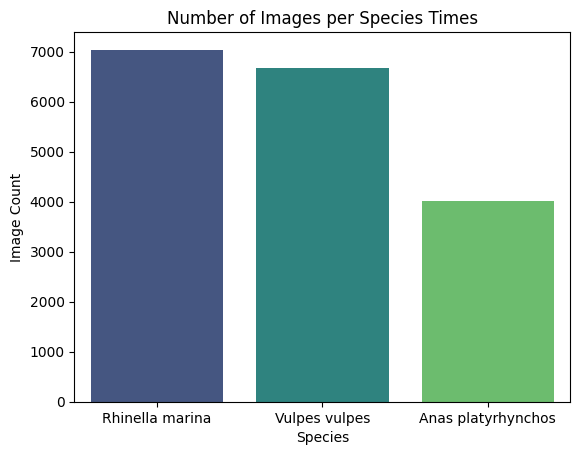

In [5]:
sns.countplot(data=df, x="species", palette="viridis")
plt.title("Number of Images per Species Times")
plt.ylabel("Image Count")
plt.xlabel("Species")
plt.show()

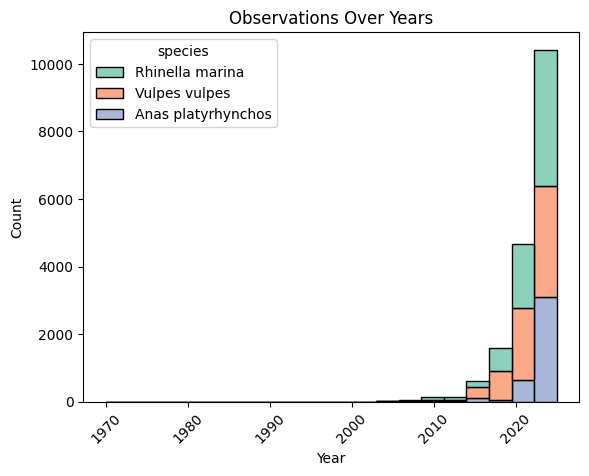

In [6]:
df["year"] = df["eventDate"].dt.year
sns.histplot(data=df, x="year", hue="species", multiple="stack", bins=20, palette="Set2")
plt.title("Observations Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

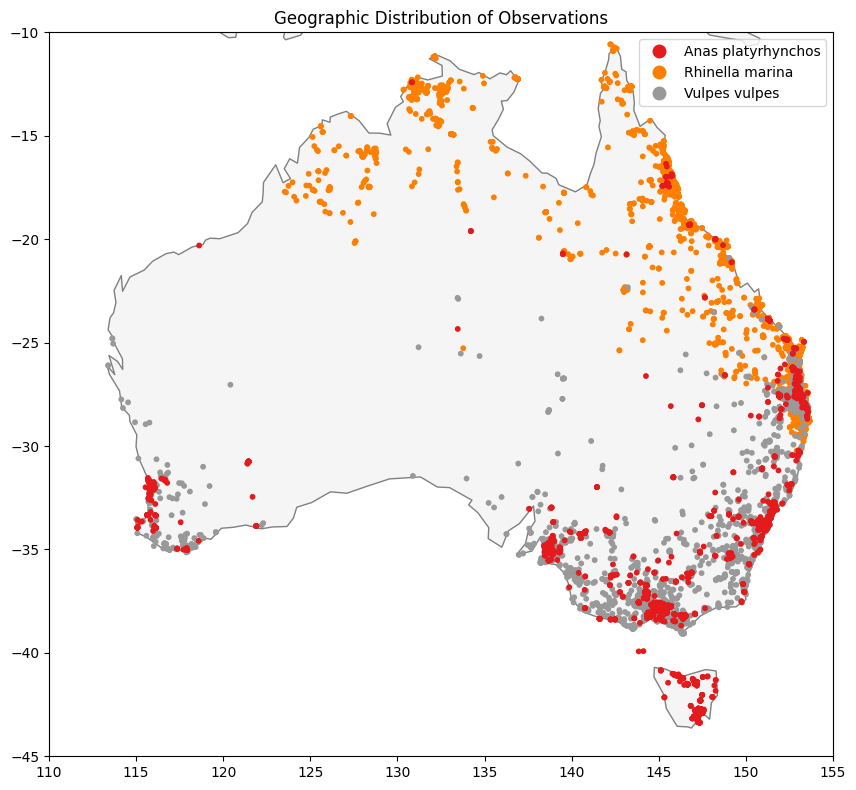

In [7]:
df_geo = df.dropna(subset=["decimalLatitude", "decimalLongitude"])

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df_geo, geometry=gpd.points_from_xy(df_geo["decimalLongitude"], df_geo["decimalLatitude"]), crs="EPSG:4326")

# Plot map
world = gpd.read_file("/Users/mdshayan/Desktop/invasive-species-classifier/data/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

ax = world.plot(figsize=(10, 8), color="whitesmoke", edgecolor="gray")

# Plot species points
gdf.plot(ax=ax, column="species", markersize=10, legend=True, cmap="Set1")

# Set map bounds for Australia
ax.set_xlim(110, 155)   # Longitude range (WA to QLD/NSW)
ax.set_ylim(-45, -10)   # Latitude range (TAS to NT)
plt.title("Geographic Distribution of Observations")
plt.tight_layout()
plt.show()

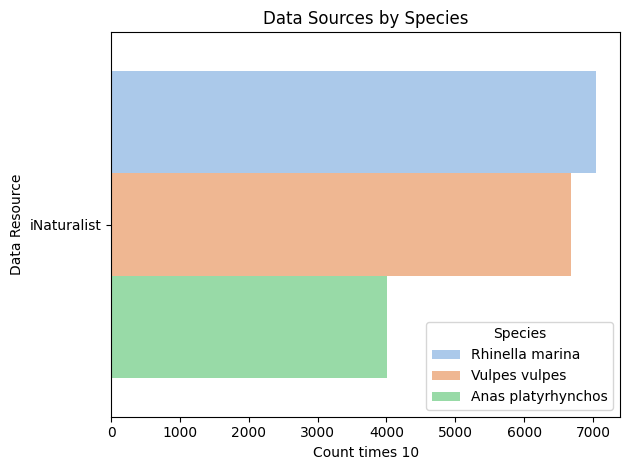

In [8]:
sns.countplot(data=df, y="dataResourceName", hue="species", palette="pastel")
plt.title("Data Sources by Species")
plt.xlabel("Count times 10")
plt.ylabel("Data Resource")
plt.legend(title="Species")
plt.tight_layout()
plt.show()
